<a href="https://colab.research.google.com/github/Devansh98350/ML-Lab/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
#importing required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2
import os

tf.random.set_seed(23)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Pre-processing

In [3]:
#Reading directory of dataset
data_dir = '/content/drive/MyDrive/Mini_Project/Mango_Dataset'

In [4]:
#print all directories of dataset
print(os.listdir(data_dir))

['Anthracnose', 'Healthy', 'Sooty_Mould', 'Powdery_Mildew', 'Gall_Midge', 'Die_Back', 'Cutting_Weevil', 'Bacterial_Canker', '.ipynb_checkpoints', 'train', 'test', 'valid']


In [5]:
#Convert directories of data to a dataframe
df = {"img_path":[],"class_names":[]}
for class_names in os.listdir(data_dir):
    for img_path in glob.glob(f"{data_dir}/{class_names}/*"):
        df["img_path"].append(img_path)
        df["class_names"].append(class_names)
df = pd.DataFrame(df)
   

In [6]:
df.shape

(4000, 2)

In [7]:
df.sample(5)

,img_path,class_names
1397,/content/drive/MyDrive/Mini_Project/Mango_Data...,Sooty_Mould
332,/content/drive/MyDrive/Mini_Project/Mango_Data...,Anthracnose
3603,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial_Canker
542,/content/drive/MyDrive/Mini_Project/Mango_Data...,Healthy
2633,/content/drive/MyDrive/Mini_Project/Mango_Data...,Die_Back


In [8]:
#Divide the data into train,test and development 60% train, 20% test and 20% development
from sklearn.model_selection import train_test_split

train_size=0.6
# In the first step we will split the data in training and remaining dataset
train,rem = train_test_split(df, train_size=0.6)

test_size = 0.5
dev,test = train_test_split(rem, test_size=0.5)

print(train.count())
print(dev.count())
print(test.count())

img_path       2400
class_names    2400
dtype: int64
img_path       800
class_names    800
dtype: int64
img_path       800
class_names    800
dtype: int64


In [9]:
df['img_path'][0]

'/content/drive/MyDrive/Mini_Project/Mango_Dataset/Anthracnose/20211008_124250 (Custom).jpg'

In [12]:
#printing pixels of one image as a NumPy array of pixel values
img = cv2.imread(df.img_path[0])
print(img)

[[[229 214 205]
  [229 214 205]
  [229 214 205]
  ...
  [204 182 164]
  [204 182 164]
  [204 182 164]]

 [[229 214 205]
  [229 214 205]
  [229 214 205]
  ...
  [203 181 163]
  [204 182 164]
  [204 182 164]]

 [[229 214 205]
  [229 214 205]
  [229 214 205]
  ...
  [203 181 163]
  [203 181 163]
  [203 181 163]]

 ...

 [[209 189 172]
  [209 189 172]
  [208 188 171]
  ...
  [192 167 147]
  [192 167 147]
  [192 167 147]]

 [[209 189 172]
  [209 189 172]
  [208 188 171]
  ...
  [192 167 147]
  [192 167 147]
  [192 167 147]]

 [[209 189 172]
  [209 189 172]
  [208 188 171]
  ...
  [192 167 147]
  [192 167 147]
  [192 167 147]]]


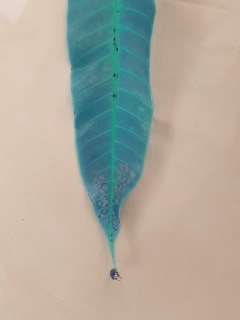

In [16]:
#visualizing an image
from PIL import Image
import numpy as np
from IPython.display import display

# define the shape of the image
height = 100
width = 100
channels = 3
pixel_values = cv2.imread(df.img_path[0])
image = Image.fromarray(pixel_values.astype('uint8'))
display(image)

#Encoding the class Names

In [ ]:
#Label Encoding for classnames
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train["class_names"] = Le.fit_transform(train["class_names"])
test["class_names"] = Le.fit_transform(test["class_names"])
dev["class_names"] = Le.fit_transform(dev["class_names"])

In [ ]:
train.sample(5)

,img_path,class_names
1551,/content/drive/MyDrive/Mini_Project/Mango_Data...,3
265,/content/drive/MyDrive/Mini_Project/Mango_Data...,1
2895,/content/drive/MyDrive/Mini_Project/Mango_Data...,5
2415,/content/drive/MyDrive/Mini_Project/Mango_Data...,4
1522,/content/drive/MyDrive/Mini_Project/Mango_Data...,3


In [ ]:
dev.sample(5)

,img_path,class_names
2339,/content/drive/MyDrive/Mini_Project/Mango_Data...,4
988,/content/drive/MyDrive/Mini_Project/Mango_Data...,0
2205,/content/drive/MyDrive/Mini_Project/Mango_Data...,4
3995,/content/drive/MyDrive/Mini_Project/Mango_Data...,7
2677,/content/drive/MyDrive/Mini_Project/Mango_Data...,5


In [ ]:
test.sample(5)

,img_path,class_names
3607,/content/drive/MyDrive/Mini_Project/Mango_Data...,7
80,/content/drive/MyDrive/Mini_Project/Mango_Data...,1
482,/content/drive/MyDrive/Mini_Project/Mango_Data...,1
616,/content/drive/MyDrive/Mini_Project/Mango_Data...,0
1394,/content/drive/MyDrive/Mini_Project/Mango_Data...,2


In [ ]:
#Assining required constants
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)

In [ ]:
#One Hot encoding
train_labels = tf.keras.utils.to_categorical(train["class_names"])
dev_labels = tf.keras.utils.to_categorical(dev["class_names"])
test_labels = tf.keras.utils.to_categorical(test["class_names"])

In [ ]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
dev_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Compute class weights 
classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.0909091, 1: 1.0032154, 2: 1.0097088, 3: 1.0721649, 4: 1.0, 5: 1.0469799, 6: 1.0469799, 7: 1.0576271}


#Creating Tensorflow dataset object

In [ ]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [ ]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [ ]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [ ]:
# Creating Train Dataset object and Verifying it
%time 
train_dataset = get_dataset(train["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset)) 
print(image.shape)
print(label.shape)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
(64, 96, 96, 3)
(64, 8)


Cutting Weevil


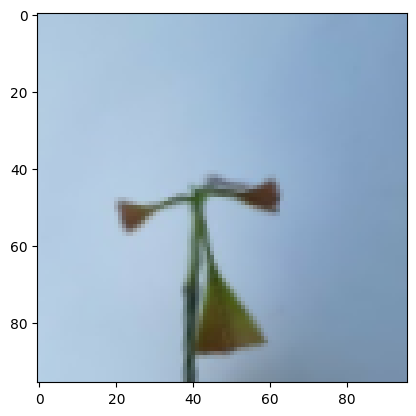

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [ ]:
# Creating dev Dataset object and Verifying it
%time 
val_dataset = get_dataset(dev["img_path"] , dev_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
(64, 96, 96, 3)
(64, 8)


Powdery Mildew


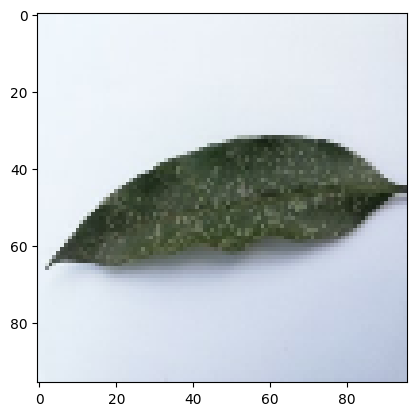

In [ ]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [ ]:
# Creating test Dataset object and Verifying it
%time 
test_dataset = get_dataset(test["img_path"] , test_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
(64, 96, 96, 3)
(64, 8)


Bacterial Canker


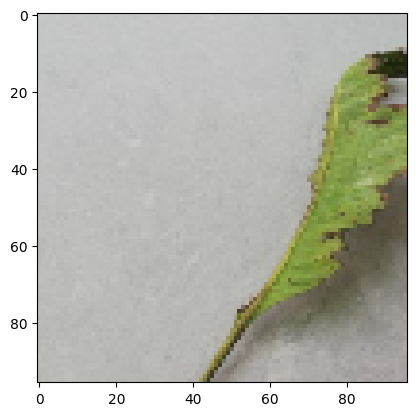

In [ ]:
# View a sample Test Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

#First Model

In [ ]:
# Building EfficientNet model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model1 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model1.summary()

31790344/31790344 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 

In [ ]:
# Compiling the model by providing the Optimizer , Loss and Metrics
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# Train the model
history1 = model1.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 496s 12s/step - loss: 0.1711 - accuracy: 0.7905 - precision: 0.7240 - recall: 0.7610 - val_loss: 0.0966 - val_accuracy: 0.8776 - val_precision: 0.9157 - val_recall: 0.8203
Epoch 2/12
37/37 [==============================] - 12s 316ms/step - loss: 0.0366 - accuracy: 0.9632 - precision: 0.9577 - recall: 0.9585 - val_loss: 0.1239 - val_accuracy: 0.9102 - val_precision: 0.9193 - val_recall: 0.9049
Epoch 3/12
37/37 [==============================] - 15s 405ms/step - loss: 0.0357 - accuracy: 0.9662 - precision: 0.9652 - recall: 0.9606 - val_loss: 0.0671 - val_accuracy: 0.9258 - val_precision: 0.9462 - val_recall: 0.9167
Epoch 4/12
37/37 [==============================] - 12s 327ms/step - loss: 0.0268 - accuracy: 0.9777 - precision: 0.9758 - recall: 0.9666 - val_loss: 0.0934 - val_accuracy: 0.9349 - val_precision: 0.9419 - val_recall: 0.9284
Epoch 5/12
37/37 [==============================] - 12s 319ms/step - loss: 0.0222 - accuracy: 0.9777 

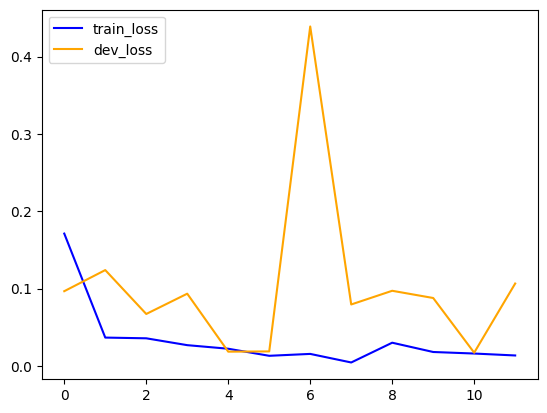

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],color='blue',label='train_loss')
plt.plot(history1.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

#Second Model

In [ ]:
#Second model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model2 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         3244288   
                                                                 
 global_average_pooling2d_1   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 2056      
                                                      

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
history2 = model2.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 74s 341ms/step - loss: 0.1253 - accuracy: 0.8530 - precision: 0.8354 - recall: 0.8142 - val_loss: 0.2069 - val_accuracy: 0.7878 - val_precision: 0.8077 - val_recall: 0.7604
Epoch 2/12
37/37 [==============================] - 9s 239ms/step - loss: 0.0394 - accuracy: 0.9636 - precision: 0.9621 - recall: 0.9563 - val_loss: 0.2320 - val_accuracy: 0.8451 - val_precision: 0.8787 - val_recall: 0.8021
Epoch 3/12
37/37 [==============================] - 12s 326ms/step - loss: 0.0306 - accuracy: 0.9735 - precision: 0.9754 - recall: 0.9692 - val_loss: 0.0674 - val_accuracy: 0.9440 - val_precision: 0.9428 - val_recall: 0.9440
Epoch 4/12
37/37 [==============================] - 12s 318ms/step - loss: 0.0245 - accuracy: 0.9726 - precision: 0.9746 - recall: 0.9700 - val_loss: 0.0742 - val_accuracy: 0.9518 - val_precision: 0.9567 - val_recall: 0.9492
Epoch 5/12
37/37 [==============================] - 11s 313ms/step - loss: 0.0048 - accuracy: 0.9961 

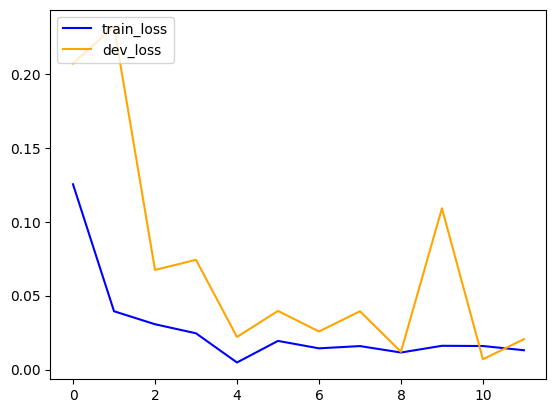

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'],color='blue',label='train_loss')
plt.plot(history2.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

#Third Model

In [ ]:
#Third model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model3 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D((3,3)),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         5767424   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 256)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
history3 = model3.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 77s 373ms/step - loss: 0.1301 - accuracy: 0.8370 - precision: 0.7990 - recall: 0.8108 - val_loss: 0.0788 - val_accuracy: 0.9323 - val_precision: 0.9439 - val_recall: 0.9193
Epoch 2/12
37/37 [==============================] - 13s 346ms/step - loss: 0.0330 - accuracy: 0.9688 - precision: 0.9662 - recall: 0.9658 - val_loss: 0.0231 - val_accuracy: 0.9674 - val_precision: 0.9761 - val_recall: 0.9557
Epoch 3/12
37/37 [==============================] - 12s 318ms/step - loss: 0.0368 - accuracy: 0.9670 - precision: 0.9661 - recall: 0.9623 - val_loss: 0.1615 - val_accuracy: 0.9062 - val_precision: 0.9248 - val_recall: 0.8490
Epoch 4/12
37/37 [==============================] - 13s 367ms/step - loss: 0.0211 - accuracy: 0.9799 - precision: 0.9806 - recall: 0.9760 - val_loss: 0.1229 - val_accuracy: 0.9141 - val_precision: 0.9428 - val_recall: 0.8802
Epoch 5/12
37/37 [==============================] - 11s 297ms/step - loss: 0.0256 - accuracy: 0.9760

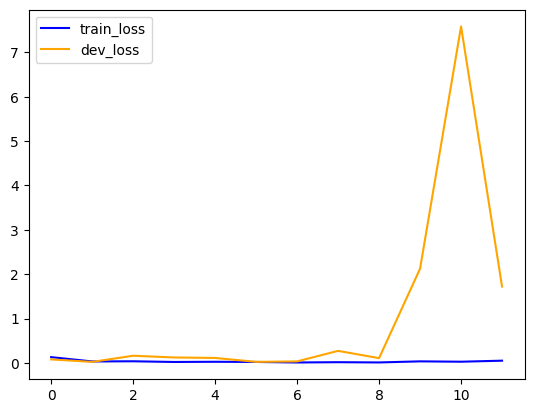

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'],color='blue',label='train_loss')
plt.plot(history3.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

# Fourth Model

In [ ]:
#Fourth model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model4 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), padding='same'),
    tf.keras.layers.Conv2D(256, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model4.summary()


Model: "sequential_7"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   

                                                                 

 conv2d_5 (Conv2D)           (None, 3, 3, 256)         5767424   

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 1, 1, 256)        0         

 2D)                                                             

                                                                 

 conv2d_6 (Conv2D)           (None, 1, 1, 256)         1048832   

                                                                 

 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0         

 2D)                                                             

                                                                 

 flatten_1 (Flatten)         (None, 25

In [ ]:
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
history4 = model4.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10

37/37 [==============================] - 244s 6s/step - loss: 0.2097 - accuracy: 0.7272 - precision: 0.7650 - recall: 0.6655 - val_loss: 1.0106 - val_accuracy: 0.1445 - val_precision: 0.1342 - val_recall: 0.0898

Epoch 2/10

37/37 [==============================] - 1103s 31s/step - loss: 0.0963 - accuracy: 0.8985 - precision: 0.9183 - recall: 0.8754 - val_loss: 16.3941 - val_accuracy: 0.2617 - val_precision: 0.2703 - val_recall: 0.2383

Epoch 3/10

37/37 [==============================] - 221s 6s/step - loss: 0.0810 - accuracy: 0.9204 - precision: 0.9366 - recall: 0.8981 - val_loss: 14.0574 - val_accuracy: 0.1667 - val_precision: 0.1688 - val_recall: 0.1849

Epoch 4/10

37/37 [==============================] - 219s 6s/step - loss: 0.0606 - accuracy: 0.9422 - precision: 0.9506 - recall: 0.9302 - val_loss: 7.9841 - val_accuracy: 0.5560 - val_precision: 0.6127 - val_recall: 0.5169

Epoch 5/10

37/37 [==============================] - 212s 6s/step - loss: 0.0468 - accuracy: 0.9

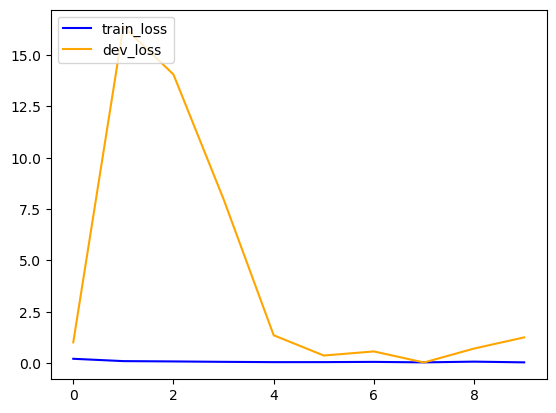

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'],color='blue',label='train_loss')
plt.plot(history4.history['val_loss'],color='orange',label='dev_loss')
plt.legend(loc='upper left')
plt.show()

#Applying model on dataset

In [ ]:
#Now we apply the second model on the test data
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model_test = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='sigmoid')
])

model_test.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 256)         3244288   
                                                                 
 global_average_pooling2d_2   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 2056      
                                                      

In [ ]:
model_test.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
history_test = model_test.fit(
    train_dataset,
    steps_per_epoch=len(train_labels)//BATCH_SIZE,
    epochs=12,
    validation_data=test_dataset,
    validation_steps = len(dev_labels)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
37/37 [==============================] - 394s 9s/step - loss: 0.1228 - accuracy: 0.8412 - precision: 0.8184 - recall: 0.7956 - val_loss: 0.2440 - val_accuracy: 0.7826 - val_precision: 0.8198 - val_recall: 0.7760
Epoch 2/12
37/37 [==============================] - 11s 294ms/step - loss: 0.0453 - accuracy: 0.9563 - precision: 0.9569 - recall: 0.9512 - val_loss: 0.0507 - val_accuracy: 0.9609 - val_precision: 0.9606 - val_recall: 0.9531
Epoch 3/12
37/37 [==============================] - 13s 349ms/step - loss: 0.0315 - accuracy: 0.9747 - precision: 0.9730 - recall: 0.9705 - val_loss: 0.0799 - val_accuracy: 0.9622 - val_precision: 0.9621 - val_recall: 0.9596
Epoch 4/12
37/37 [==============================] - 13s 349ms/step - loss: 0.0213 - accuracy: 0.9803 - precision: 0.9807 - recall: 0.9790 - val_loss: 0.1342 - val_accuracy: 0.9284 - val_precision: 0.9281 - val_recall: 0.9245
Epoch 5/12
37/37 [==============================] - 12s 317ms/step - loss: 0.0214 - accuracy: 0.9837 -

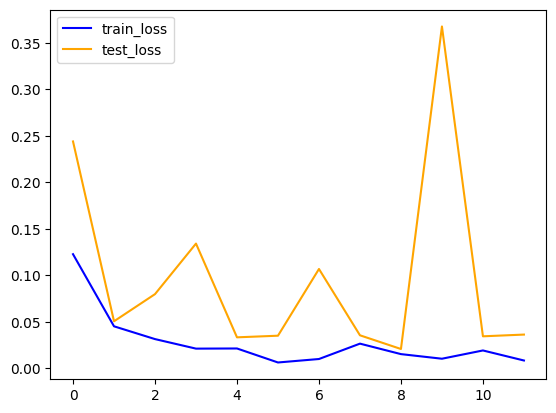

In [ ]:
#Plotting graph
import matplotlib.pyplot as plt
plt.plot(history_test.history['loss'],color='blue',label='train_loss')
plt.plot(history_test.history['val_loss'],color='orange',label='test_loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
df

,img_path,class_names
0,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker
1,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker
2,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker
3,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker
4,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker
...,...,...
3995,/content/drive/MyDrive/Mini_Project/Mango_Data...,Sooty Mould
3996,/content/drive/MyDrive/Mini_Project/Mango_Data...,Sooty Mould
3997,/content/drive/MyDrive/Mini_Project/Mango_Data...,Sooty Mould
3998,/content/drive/MyDrive/Mini_Project/Mango_Data...,Sooty Mould


In [ ]:
#Convert the image path to pixels
df['img_data'] = [cv2.imread(img_path) for img_path in df['img_path']]

In [ ]:
df.head()

,img_path,class_names,img_data
0,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker,"[[[203, 203, 203], [203, 203, 203], [203, 203,..."
1,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker,"[[[202, 202, 202], [203, 203, 203], [203, 203,..."
2,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker,"[[[214, 216, 216], [213, 215, 215], [212, 214,..."
3,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker,"[[[247, 248, 246], [248, 249, 247], [248, 249,..."
4,/content/drive/MyDrive/Mini_Project/Mango_Data...,Bacterial Canker,"[[[191, 192, 190], [191, 192, 190], [190, 191,..."


In [ ]:
df['img_data'][0]

array([[[203, 203, 203],
        [203, 203, 203],
        [203, 203, 203],
        ...,
        [197, 197, 197],
        [196, 196, 196],
        [196, 196, 196]],

       [[203, 203, 203],
        [203, 203, 203],
        [204, 204, 204],
        ...,
        [198, 198, 198],
        [197, 197, 197],
        [197, 197, 197]],

       [[203, 203, 203],
        [204, 204, 204],
        [204, 204, 204],
        ...,
        [199, 199, 199],
        [199, 199, 199],
        [199, 199, 199]],

       ...,

       [[183, 185, 186],
        [185, 187, 188],
        [188, 190, 191],
        ...,
        [133, 145, 151],
        [131, 143, 149],
        [130, 142, 148]],

       [[183, 185, 186],
        [186, 188, 189],
        [190, 192, 193],
        ...,
        [129, 141, 147],
        [129, 141, 147],
        [130, 142, 148]],

       [[182, 184, 185],
        [187, 189, 190],
        [191, 193, 194],
        ...,
        [125, 137, 143],
        [126, 138, 144],
        [129, 141, 147]]

In [ ]:
from skimage.transform import resize

img_data_flat = np.array([resize(img, (100, 100)).flatten() for img in df['img_data']])
print(img_data_flat)

[[0.79690048 0.79690048 0.79690048 ... 0.5074435  0.55443862 0.57809544]
 [0.79697362 0.79697362 0.79697362 ... 0.61327342 0.62111656 0.65248911]
 [0.82913117 0.83697431 0.83697431 ... 0.68572126 0.70153483 0.72114267]
 ...
 [0.78076926 0.77292612 0.77292612 ... 0.84334471 0.81197216 0.81197216]
 [0.95284943 0.95284943 0.95284943 ... 0.91939888 0.89979103 0.90763417]
 [0.95749843 0.93539385 0.93931542 ... 0.68409914 0.72331482 0.72331482]]


#Finding Accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(img_data_flat, df['class_names'])
accuracy = neigh.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.853


In [ ]:
neigh1 = KNeighborsClassifier(n_neighbors=5)
neigh1.fit(img_data_flat, df['class_names'])
accuracy = neigh1.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.78725


In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=7)
neigh2.fit(img_data_flat, df['class_names'])
accuracy = neigh2.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.76625


In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=9)
neigh3.fit(img_data_flat, df['class_names'])
accuracy = neigh3.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.73675


In [ ]:
neigh4 = KNeighborsClassifier(n_neighbors=11)
neigh4.fit(img_data_flat, df['class_names'])
accuracy = neigh4.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.7255


In [ ]:
neigh5 = KNeighborsClassifier(n_neighbors=13)
neigh5.fit(img_data_flat, df['class_names'])
accuracy = neigh5.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.712


In [ ]:
neigh6 = KNeighborsClassifier(n_neighbors=15)
neigh6.fit(img_data_flat, df['class_names'])
accuracy = neigh6.score(img_data_flat, df['class_names'])
print("Accuracy: ", accuracy)

Accuracy:  0.70175


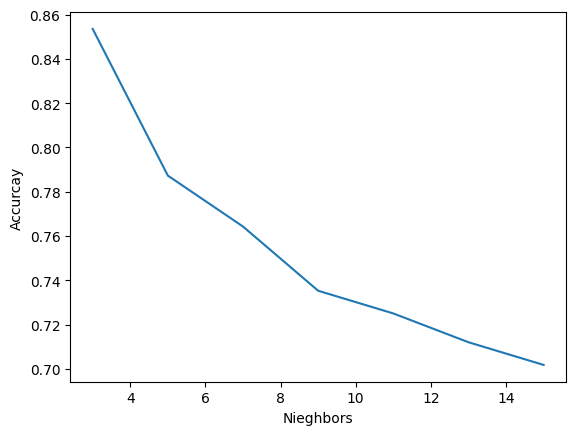

In [ ]:
#Plot a graph for neighbors vs accuracy
x=[3,5,7,9,11,13,15]
y=[0.8535,0.78725,0.76425,0.73525,0.725,0.712,
   0.70175]
plt.xlabel("Nieghbors")
plt.ylabel("Accurcay")
plt.plot(x,y)